**K-MEANS CLUSTERING**

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


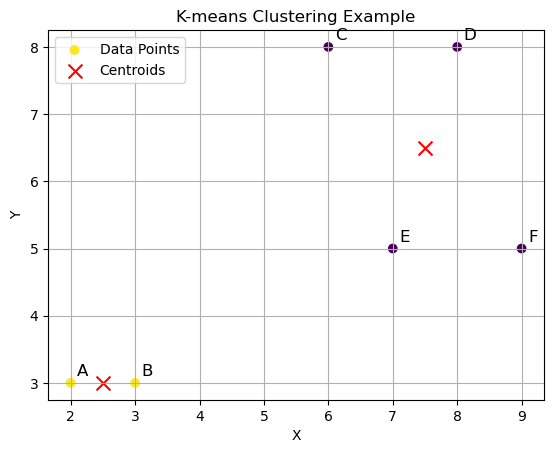

In [10]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
 
# Define the data points (A, B, C, D, E, F)

data = np.array([

    [2, 3],  # Point A

    [3, 3],  # Point B

    [6, 8],  # Point C

    [8, 8],  # Point D

    [7, 5],  # Point E

    [9, 5]   # Point F

])
 
# Perform K-means clustering with K=2

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
 
# Get the cluster centers (centroids) and labels

centroids = kmeans.cluster_centers_

labels = kmeans.labels_
 
# Print the final centroids and cluster assignments

print("Final Centroids (Cluster Centers):")

print(centroids)
 
print("\nCluster Assignments:")

for i, label in enumerate(labels):

    print(f"Point {chr(65+i)}: Cluster {label+1}")
 
# Plot the data points and the centroids

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
 
# Annotate points

for i, point in enumerate(data):

    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')

plt.xlabel('X')

plt.ylabel('Y')

plt.legend()

plt.grid(True)

plt.show()

 

In [12]:
import pandas as pd
import numpy as np
df=pd.read_csv("kmeans_dataset_with_outliers.csv")
df.head()

,X,Y,Label
0,1.248357,1.760413,Cluster 1
1,0.930868,1.907171,Cluster 1
2,1.323844,1.446833,Cluster 1
3,1.761515,1.401897,Cluster 1
4,0.882923,2.406263,Cluster 1


In [18]:
df=df.drop('Label',axis='columns')

In [20]:
df.head()

,X,Y
0,1.248357,1.760413
1,0.930868,1.907171
2,1.323844,1.446833
3,1.761515,1.401897
4,0.882923,2.406263


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

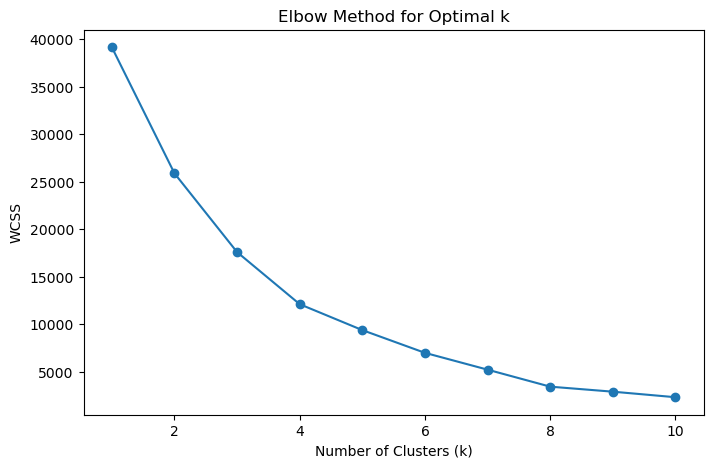

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['X', 'Y']].values  # Convert DataFrame to NumPy array
wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Append WCSS value

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


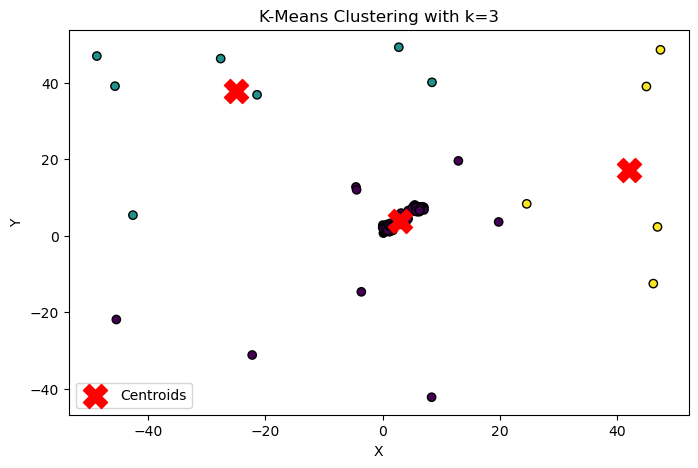

In [28]:
optimal_k = 3  # Example, choose based on the elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Scatter Plot of Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.legend()
plt.show()


In [30]:
df['Cluster'] = df['Cluster'].apply(lambda x: f'Cluster{x+1}')
print(df)

             X          Y   Cluster
0     1.248357   1.760413  Cluster1
1     0.930868   1.907171  Cluster1
2     1.323844   1.446833  Cluster1
3     1.761515   1.401897  Cluster1
4     0.882923   2.406263  Cluster1
..         ...        ...       ...
195 -22.261882 -31.187884  Cluster1
196  -3.630160 -14.664777  Cluster1
197   8.365611 -42.226536  Cluster1
198  47.439481  48.621074  Cluster3
199  19.816171   3.609637  Cluster1

[200 rows x 3 columns]
